In [14]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.ticker as ticker  # J’importe le module nécessaire pour formater les nombres sur les axes.


import seaborn as sns

In [15]:
df = pd.read_csv("C:\\Users\\wilfr\\projets-github\\visualisations\\python\\datasets\\open_medic_cleaned.zip", compression="zip", sep=";", encoding="utf-8-sig" )

In [16]:
df.head()

,Sous-groupe_pharmacologique,Libelle_sous-groupe_pharmacologique,Code_identification_pharmaceutique,Libelle_identification_pharmaceutique,Top_Generique,Tranche_age_soins,Sexe,Code_region_residence,Region_residence,Code_prescripteur,Prescripteur,nb_boites_delivrees,Montant_rembourse,Base_remboursement,Annee
0,J01A,Tetracyclines,3400921897579,Doxycycline sdz 100mg cpr 30,Générique,0-19 ans,M,11,Ile-de-France,1,Médecine générale libérale,1210,4740.03,7393.21,2019
1,J01A,Tetracyclines,3400921897579,Doxycycline sdz 100mg cpr 30,Générique,0-19 ans,M,11,Ile-de-France,4,Chirurgie libérale,19,75.67,116.42,2019
2,J01A,Tetracyclines,3400921897579,Doxycycline sdz 100mg cpr 30,Générique,0-19 ans,M,11,Ile-de-France,5,Dermatologie et vénéréologie libérale,965,3819.44,5895.93,2019
3,J01A,Tetracyclines,3400921897579,Doxycycline sdz 100mg cpr 30,Générique,0-19 ans,M,11,Ile-de-France,12,Pédiatrie libérale,19,75.81,115.70,2019
4,J01A,Tetracyclines,3400921897579,Doxycycline sdz 100mg cpr 30,Générique,0-19 ans,M,11,Ile-de-France,90,Prescripteurs salariés,491,1981.59,3003.01,2019


In [17]:
# Je crée une copie du DataFrame pour la visualisation afin de préserver les données originales.

df_viz = df.copy()

In [18]:
# Je commence par vérifier toutes les valeurs possibles dans la colonne Sexe.

df_viz["Sexe"].value_counts()


Sexe
F          423903
M          365349
Inconnu       670
Name: count, dtype: int64

<h3>Évolution annuelle du montant total remboursé pour les antibiotiques (2019-2024)</h3>

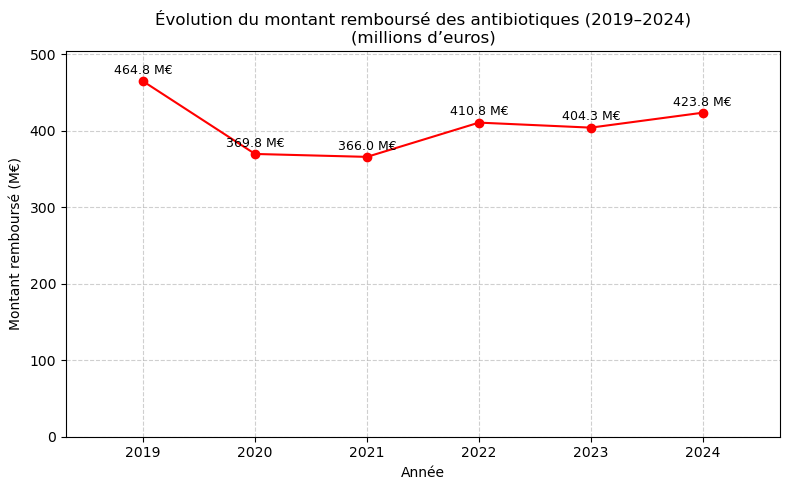

In [19]:
# Objectif, Je veux visualiser la tendance globale de la consommation remboursée d’antibiotiques
# au fil du temps, entre 2019 et 2024.

# Somme des montants remboursés par année
montant_annee = (
    df_viz.groupby("Annee")["Montant_rembourse"]
    .sum()              # total annuel
    .reset_index()      # remet "Annee" en colonne
)

# Conversion en millions d’euros
montant_annee["Montant_rembourse_me"] = montant_annee["Montant_rembourse"] / 1_000_000

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 5))

# Courbe de tendance
ax.plot(
    montant_annee["Annee"],
    montant_annee["Montant_rembourse_me"],
    marker="o", linestyle="-", color="#FF0000"
)

# Ajout des montants au-dessus des points
barres = ax.bar(montant_annee["Annee"], montant_annee["Montant_rembourse_me"], alpha=0)
ax.bar_label(barres, fmt="%.1f M€", padding=3, fontsize=9)

# Ajustement de l’échelle Y 
max_valeur = montant_annee["Montant_rembourse_me"].max()
ax.set_ylim(0, max_valeur + 40)

# Titres et étiquettes
ax.set_title("Évolution du montant remboursé des antibiotiques (2019–2024)\n(millions d’euros)")
ax.set_xlabel("Année")
ax.set_ylabel("Montant remboursé (M€)")

# Grille et affichage
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



<h3>Évolution annuelle du montant total remboursé pour les antibiotiques par sexe (2019-2024)</h3>

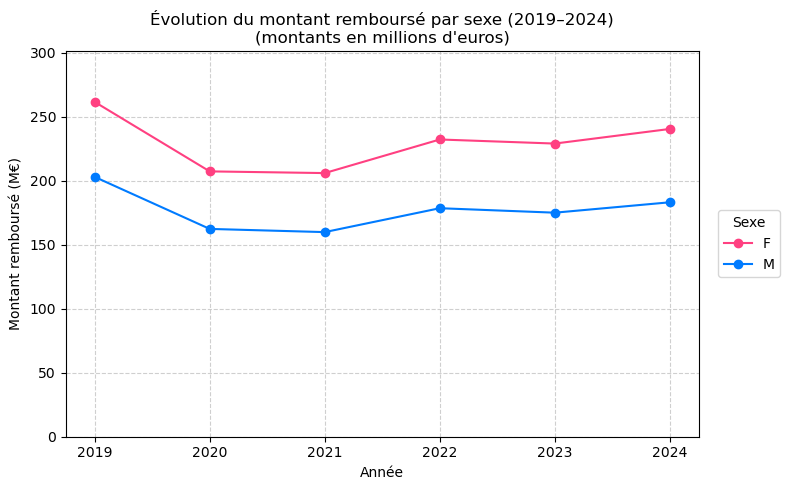

In [20]:
# Évolution du montant remboursé par sexe (2019–2024)

# Objectif : comparer l’évolution des montants remboursés entre femmes et hommes.

# Calculer le montant remboursé total par année et par sexe
montant_annee_sexe = (
    df_viz[df_viz["Sexe"].isin(["F", "M"])]
    .groupby(["Annee", "Sexe"])["Montant_rembourse"]
    .sum()
    .reset_index()
)

# Convertir en millions d’euros
montant_annee_sexe["Montant_rembourse_me"] = (
    montant_annee_sexe["Montant_rembourse"] / 1_000_000
)

# Transformer le tableau pour tracer une ligne par sexe
table_pivot_sexe = montant_annee_sexe.pivot(
    index="Annee",
    columns="Sexe",
    values="Montant_rembourse_me"
)

# Créer le graphique
fig, ax = plt.subplots(figsize=(8, 5))

table_pivot_sexe.plot(
    kind="line",
    marker="o",
    ax=ax,
    color={"F": "#ff4081", "M": "#007bff"}
)

# Ajustement de l’échelle Y 
max_valeur = montant_annee_sexe["Montant_rembourse_me"].max()
ax.set_ylim(0, max_valeur + 40)

# Personnalisation du graphique
ax.set_title("Évolution du montant remboursé par sexe (2019–2024)\n(montants en millions d'euros)")
ax.set_xlabel("Année")
ax.set_ylabel("Montant remboursé (M€)")
ax.grid(True, linestyle="--", alpha=0.6)

# Déplacer la légende à droite
ax.legend(
    title="Sexe",
    loc="center left",          # Position de référence
    bbox_to_anchor=(1.02, 0.5)  # Décalage vers la droite
)

# Forcer le démarrage de l'axe Y à 0
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


<h3>Répartition des montants remboursés par région de résidence (2019–2024)</h3>

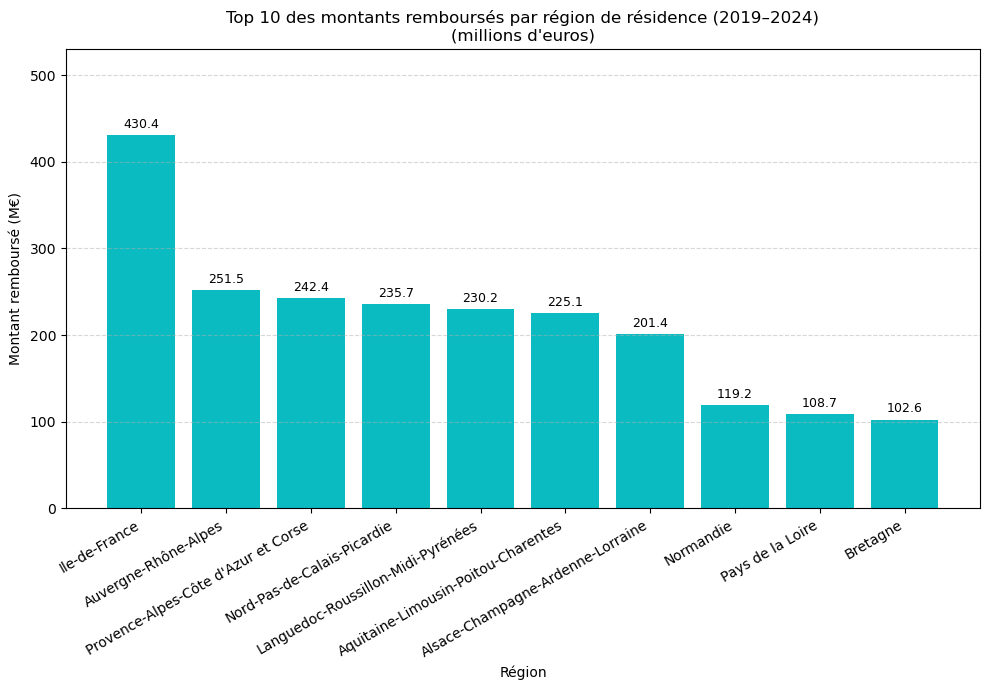

In [21]:
# Objectif, J’identifie les régions où les montants remboursés pour les antibiotiques sont les plus élevés.
# Cela me permet de repérer les différences entre les territoires
# et d’observer les régions les plus consommatrices.


# Top 10 des montants remboursés par région
montant_region = (
    df_viz.groupby("Region_residence")["Montant_rembourse"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()  # remet la région en colonne
)

# Conversion en millions d’euros
montant_region["Montant_rembourse_me"] = montant_region["Montant_rembourse"] / 1_000_000

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 7))

# Barres par région
barres = ax.bar(
    montant_region["Region_residence"],
    montant_region["Montant_rembourse_me"],
    color="#0abcc2"
)

# Affichage des valeurs sur les barres
ax.bar_label(barres, fmt="%.1f", padding=3, fontsize=9)

# Titres et axes
ax.set_title(
    "Top 10 des montants remboursés par région de résidence (2019–2024)\n"
    "(millions d'euros)"
)
ax.set_xlabel("Région")
ax.set_ylabel("Montant remboursé (M€)")

# Marges pour ne pas couper les labels
valeur_max = montant_region["Montant_rembourse_me"].max()
ax.set_ylim(0, valeur_max + 100)

# Lisibilité des labels de régions
plt.xticks(rotation=30, ha="right")

# Grille légère
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Mise en page et affichage
plt.tight_layout()
plt.show()


<h3>Consommation par tranche d’âge et sexe (2019-2024)</h3>

Sexe
F          423903
M          365349
Inconnu       670
Name: count, dtype: int64


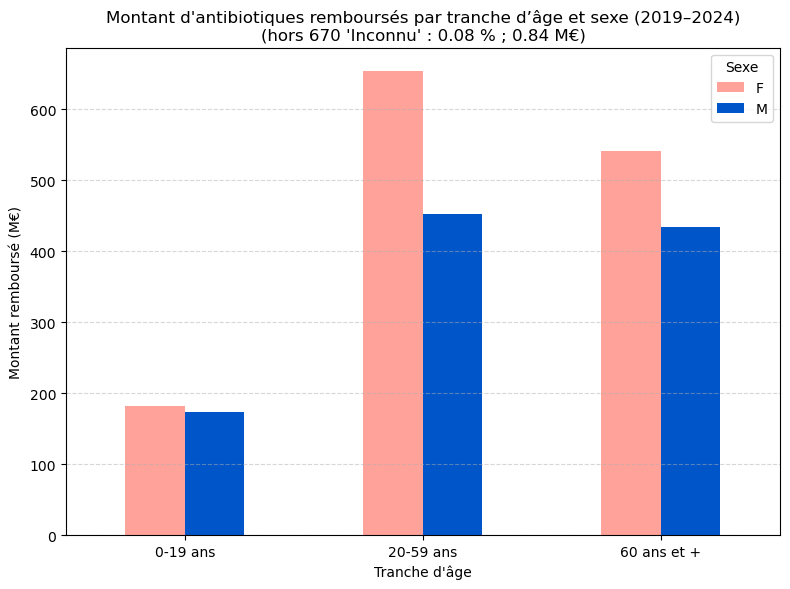

In [22]:
# Objectif, J’analyse les profils de consommation selon l’âge et le sexe
# afin d’identifier quelles tranches d’âge et quels sexes consomment le plus d’antibiotiques.

# Contrôle des données "Sexe"
compte_sexe = df_viz["Sexe"].value_counts()
print(compte_sexe)

total_valeurs = compte_sexe.sum()
nombre_inconnu = compte_sexe.get("Inconnu", 0)
pourcentage_inconnu = (nombre_inconnu / total_valeurs) * 100

# Poids financier des "Inconnu"
montant_inconnu = df_viz.loc[df_viz["Sexe"] == "Inconnu", "Montant_rembourse"].sum()
montant_inconnu_me = montant_inconnu / 1_000_000

# Filtre : on exclut "Inconnu" pour le sexe et la tranche d’âge
df_filtre = df_viz[
    (df_viz["Sexe"].isin(["F", "M"])) &
    (df_viz["Tranche_age_soins"] != "Inconnu")
]

# Montant total par tranche d’âge et sexe
table_groupee = (
    df_filtre.groupby(["Tranche_age_soins", "Sexe"])["Montant_rembourse"]
    .sum()
    .reset_index()
)

# Tableau croisé pour le tracé
table_pivot = table_groupee.pivot(
    index="Tranche_age_soins",
    columns="Sexe",
    values="Montant_rembourse"
)

# Conversion en millions d’euros
table_pivot_me = table_pivot / 1_000_000

# Graphique à barres groupées
ax = table_pivot_me.plot(
    kind="bar",
    color=["#ffa29a", "#0055c9"],
    figsize=(8, 6)
)

# Titres et labels
plt.xlabel("Tranche d'âge")
plt.ylabel("Montant remboursé (M€)")
plt.title(
    f"Montant d'antibiotiques remboursés par tranche d’âge et sexe (2019–2024)\n"
    f"(hors {nombre_inconnu} 'Inconnu' : {pourcentage_inconnu:.2f} % ; {montant_inconnu_me:.2f} M€)"
)
# Grille légère
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.xticks(rotation=0)
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()


<h3>Répartition du montant remboursé par sexe (2019-2024)</h3>

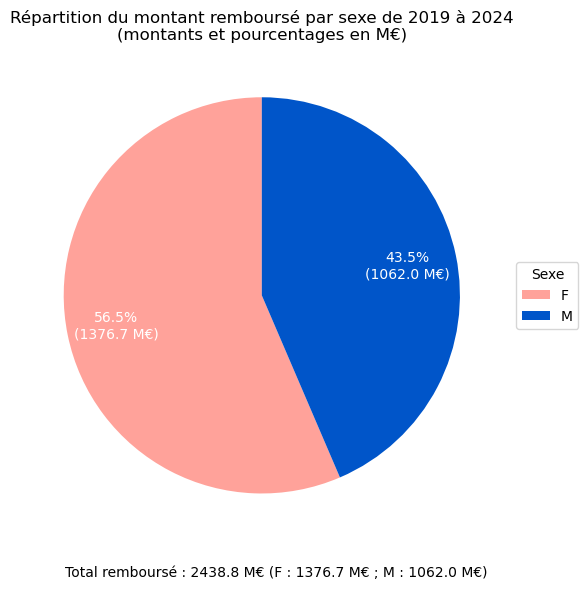

In [23]:
# Objectif, visualiser la répartition du montant remboursé par sexe de 2019 à 2024
# ce qui peut aider à identifier des disparités potentielles dans la prescription d’antibiotiques entre hommes et femmes. 

# Je garde uniquement F et M et je calcule le montant total remboursé par sexe
df_sexe = df_viz[df_viz["Sexe"].isin(["F", "M"])]
montant_par_sexe = df_sexe.groupby("Sexe")["Montant_rembourse"].sum()

# Je convertis en millions d'euros
montant_me = montant_par_sexe / 1_000_000

# Données pour le graphique
valeurs = montant_me.values
labels = montant_me.index.tolist()
couleurs = ["#ffa29a", "#0055c9"]

# Texte du camembert
def texte_camembert(pourcentage):
    total = valeurs.sum()
    montant = total * pourcentage / 100
    return f"{pourcentage:.1f}%\n({montant:.1f} M€)"

# Création du graphique
fig, ax = plt.subplots(figsize=(7, 6))
ax.pie(
    valeurs,
    labels=None,
    autopct=texte_camembert,
    colors=couleurs,
    startangle=90,
    pctdistance=0.75,
    textprops={"color": "white", "fontsize": 10}
)

# Légende "Sexe" à droite
legende = [
    Patch(facecolor=couleurs[0], label="F"),
    Patch(facecolor=couleurs[1], label="M")
]
ax.legend(handles=legende, title="Sexe", loc="center left", bbox_to_anchor=(1, 0.5))

# Titre
ax.set_title("Répartition du montant remboursé par sexe de 2019 à 2024\n"
             "(montants et pourcentages en M€)")

# Total sous le graphique
total = valeurs.sum()
texte_total = (
    f"Total remboursé : {total:.1f} M€ "
    f"(F : {montant_me['F']:.1f} M€ ; M : {montant_me['M']:.1f} M€)"
)
fig.text(0.5, 0.03, texte_total, ha="center", fontsize=10)

plt.tight_layout(rect=(0, 0.06, 1, 1))
plt.show()


<h3>Montant remboursé par région et tranche d’âge (2019-2024)</h3>

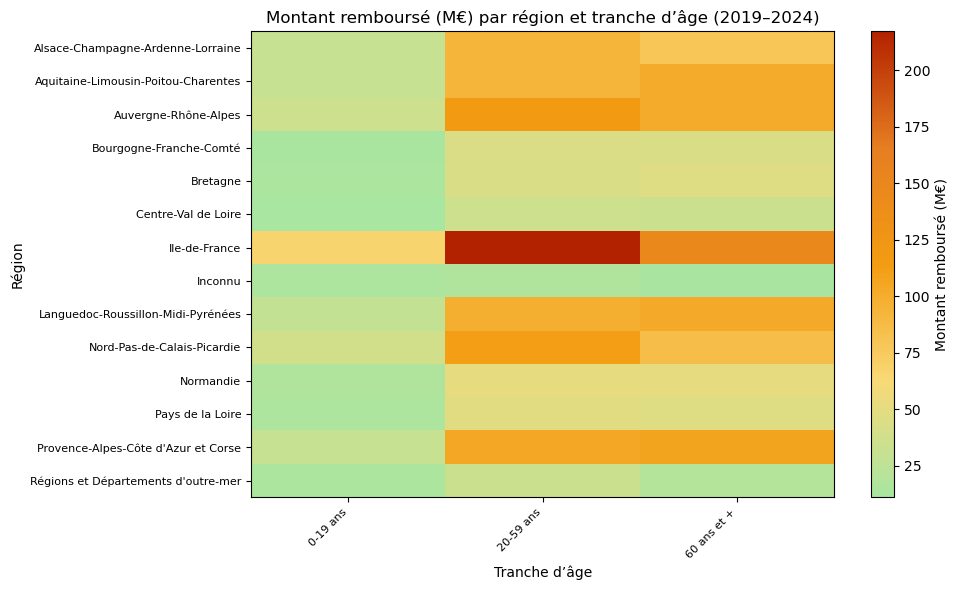

In [24]:

# Montant remboursé par région et tranche d’âge (carte de chaleur)

# Objectif, repèrer les tranches d’âge les plus consommatrices d’antibiotiques selon les régions.

# Calculer le montant remboursé total par région et tranche d’âge
table_age_region = (
    df_viz[df_viz["Tranche_age_soins"] != "Inconnu"]
    .groupby(["Region_residence", "Tranche_age_soins"])["Montant_rembourse"]
    .sum()
    .reset_index()
)

# Créer un tableau croisé :
# - lignes = régions
# - colonnes = tranches d’âge
table_pivot_age_region = table_age_region.pivot(
    index="Region_residence",
    columns="Tranche_age_soins",
    values="Montant_rembourse"
)

# Convertir les montants en millions d’euros
table_pivot_age_region = table_pivot_age_region / 1_000_000

#  Nouvelle palette lisible :
from matplotlib.colors import LinearSegmentedColormap

couleurs = ["#a8e6a1", "#f9d976", "#f39c12", "#e67e22", "#b32200"]
carte_couleurs = LinearSegmentedColormap.from_list("bleu_rouge", couleurs)

# Créer la carte de chaleur
fig, ax = plt.subplots(figsize=(10, 6))

image = ax.imshow(
    table_pivot_age_region,
    aspect="auto",
    cmap=carte_couleurs
)

# Ajouter les labels
ax.set_xticks(range(len(table_pivot_age_region.columns)))
ax.set_xticklabels(table_pivot_age_region.columns, rotation=45, ha="right", fontsize=8)

ax.set_yticks(range(len(table_pivot_age_region.index)))
ax.set_yticklabels(table_pivot_age_region.index, fontsize=8)

# Titre et axes
ax.set_title("Montant remboursé (M€) par région et tranche d’âge (2019–2024)")
ax.set_xlabel("Tranche d’âge")
ax.set_ylabel("Région")

# Barre de couleur
cbar = plt.colorbar(image)
cbar.set_label("Montant remboursé (M€)")


plt.tight_layout()
plt.show()


<h3>Top 10 des sous-groupes d’antibiotiques les plus remboursés (2019-2024)</h3>

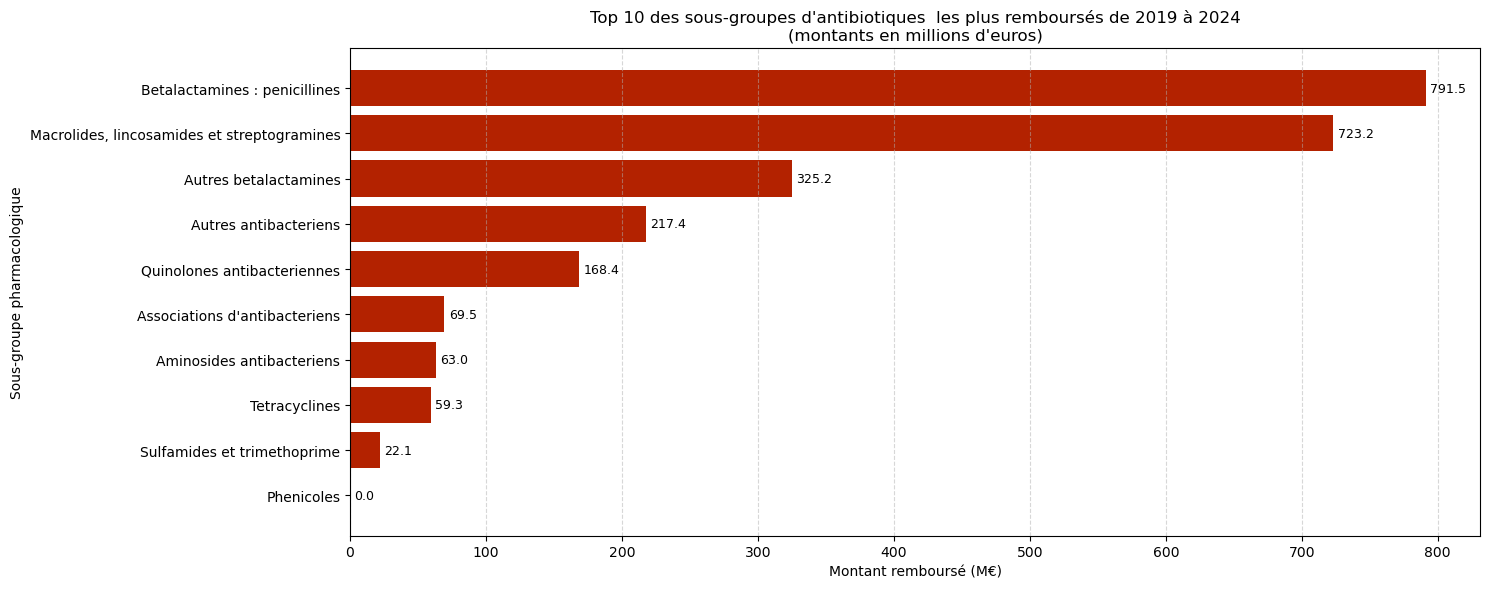

In [25]:
# Objectif, identifier les classes d’antibiotiques les plus prescrites et les plus coûteuses, 
# en se basant sur le niveau ATC3 (sous-groupe pharmacologique).

col_sous_groupe = "Libelle_sous-groupe_pharmacologique"

# Garder uniquement les sous-groupes avec un montant strictement positif
df_sous_groupe = (
    df_viz.groupby(col_sous_groupe)["Montant_rembourse"]
    .sum()
    .reset_index()
)

df_sous_groupe = df_sous_groupe[df_sous_groupe["Montant_rembourse"] > 0]

# Trier et prendre le Top 10
df_sous_groupe = (
    df_sous_groupe.sort_values("Montant_rembourse", ascending=False)
    .head(10)
)

# Convertir en millions d'euros
df_sous_groupe["Montant_rembourse_me"] = df_sous_groupe["Montant_rembourse"] / 1_000_000

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 6))

barres = ax.barh(
    df_sous_groupe[col_sous_groupe],
    df_sous_groupe["Montant_rembourse_me"],
    color="#b32200"
)

# Afficher les valeurs au bord des barres (sans boucle explicite)
ax.bar_label(barres, fmt="%.1f", padding=3, fontsize=9)

# Mettre le plus grand en haut
ax.invert_yaxis()

# Régler les labels et le titre (avec retour à la ligne pour éviter d'écraser le graphe)
ax.set_xlabel("Montant remboursé (M€)")
ax.set_ylabel("Sous-groupe pharmacologique")
ax.set_title(
    "Top 10 des sous-groupes d'antibiotiques  les plus remboursés de 2019 à 2024\n"
    "(montants en millions d'euros)"
)

# Grille légère
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Ajuster la zone de tracé pour que tout soit bien visible
fig.tight_layout()
plt.show()


<h3>Top 10 des spécialités pharmaceutiques les plus remboursées (2019-2024)</h3>

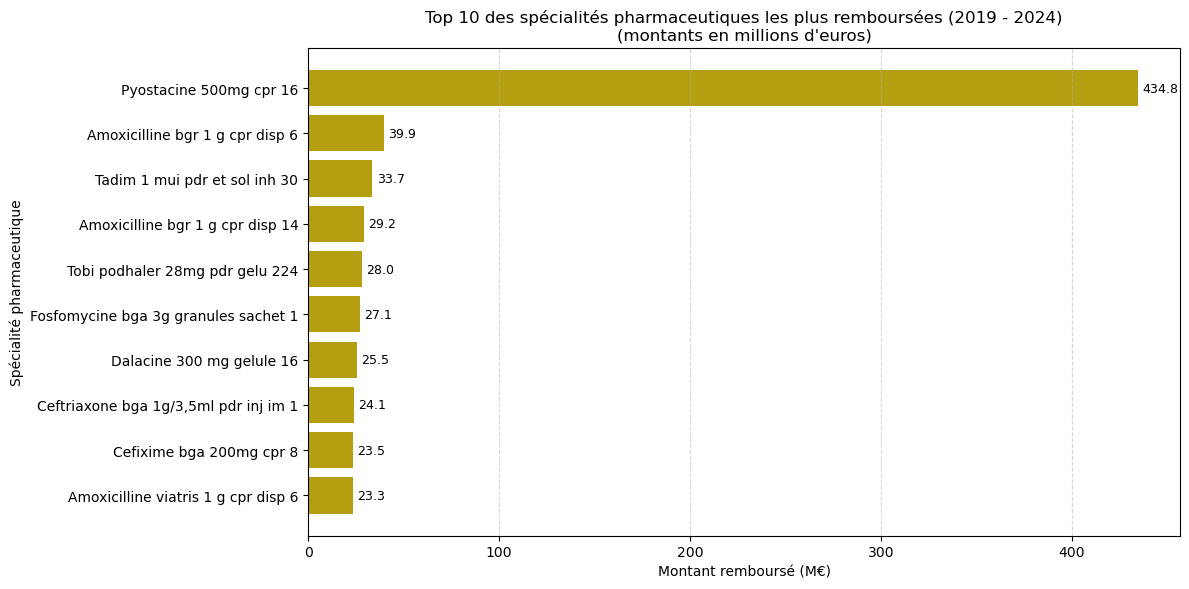

In [26]:
# Objectif, mettre en avant les spécialités les plus coûteuses.

# Je calcule le montant remboursé total par spécialité
montant_specialite = (
    df_viz.groupby("Libelle_identification_pharmaceutique")["Montant_rembourse"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Je convertis en millions d’euros
montant_specialite["Montant_rembourse_me"] = (
    montant_specialite["Montant_rembourse"] / 1_000_000
)

# Je crée le graphique en barres horizontales
fig, ax = plt.subplots(figsize=(12, 6))

barres = ax.barh(
    montant_specialite["Libelle_identification_pharmaceutique"],
    montant_specialite["Montant_rembourse_me"],
    color="#b59f10"
)

ax.bar_label(barres, fmt="%.1f", padding=3, fontsize=9)
ax.invert_yaxis()

ax.set_title("Top 10 des spécialités pharmaceutiques les plus remboursées (2019 - 2024)\n(montants en millions d'euros)")
ax.set_xlabel("Montant remboursé (M€)")
ax.set_ylabel("Spécialité pharmaceutique")
# Grille légère
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


<h3>Top 10 des montants remboursés par type de prescripteur (2019-2024)</h3>

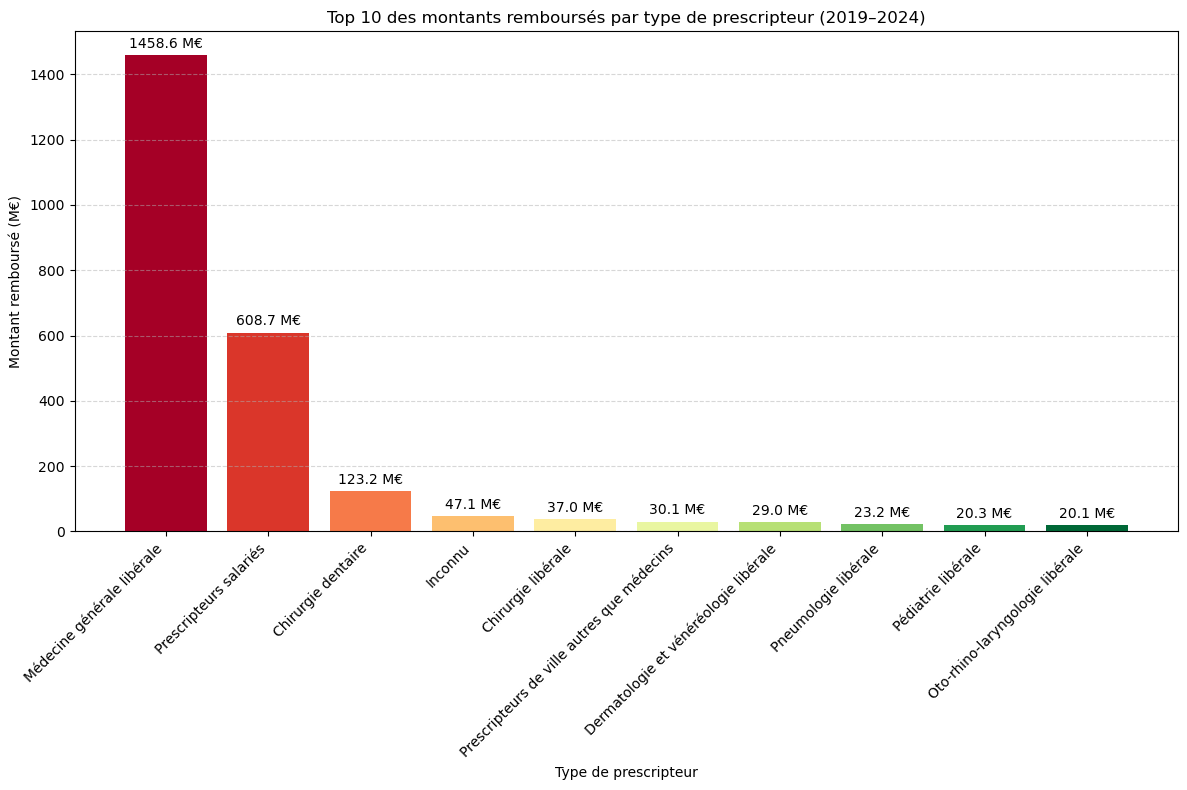

In [27]:
# Objectif, visualiser la part relative de la médecine générale et des autres spécialités 
# dans la prescription d’antibiotiques, pour éclairer les leviers potentiels des campagnes de sensibilisation.

# Regrouper les montants par type de prescripteur
montant_prescripteur = (
    df_viz.groupby("Prescripteur")["Montant_rembourse"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Convertir en millions d’euros
montant_prescripteur["Montant_rembourse_me"] = montant_prescripteur["Montant_rembourse"] / 1_000_000

# Garder les 10 premiers
top10 = montant_prescripteur.head(10)

# Dégradé de couleurs du rouge foncé (montant élevé) au vert clair (montant faible)
couleurs = [
    "#a50026",  # Rouge foncé
    "#da362a",
    "#f67a49",
    "#fdbf6f",
    "#feeda1",
    "#e9f6a1",
    "#b7e075",
    "#73c264",
    "#219c52",
    "#006837"   # Vert foncé
]

# Créer le graphique
plt.figure(figsize=(12, 8))
barres = plt.bar(
    top10["Prescripteur"],
    top10["Montant_rembourse_me"],
    color=couleurs
)

# Afficher les montants au-dessus des barres
plt.bar_label(barres, fmt="%.1f M€", padding=3)

# Ajouter les titres et axes
plt.title("Top 10 des montants remboursés par type de prescripteur (2019–2024)")
plt.xlabel("Type de prescripteur")
plt.ylabel("Montant remboursé (M€)")
plt.xticks(rotation=45, ha="right")

# Grille légère
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


<h3>Part en pourcentage des principaux prescripteurs dans le montant total remboursé (2019-2024)</h3>

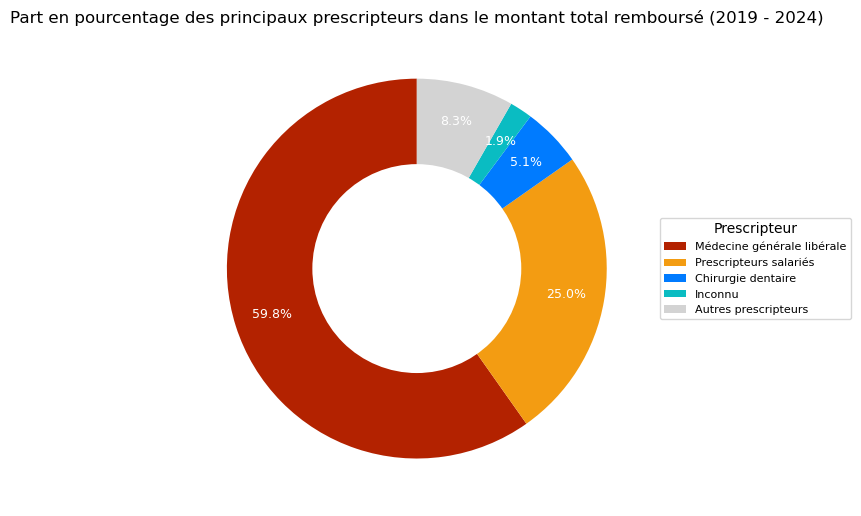

In [28]:
# Objectif, Identifier quels types de prescripteurs concentrent l'essentiel des remboursements.

# Calculer le montant total remboursé par type de prescripteur
montant_prescripteur = (
    df_viz.groupby("Prescripteur")["Montant_rembourse"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Garder les 4 principaux prescripteurs
top4 = montant_prescripteur.head(4).copy()

# Regrouper tous les autres dans une catégorie "Autres prescripteurs"
autres_montant = montant_prescripteur["Montant_rembourse"].iloc[4:].sum()
autres = pd.DataFrame({
    "Prescripteur": ["Autres prescripteurs"],
    "Montant_rembourse": [autres_montant]
})
top4 = pd.concat([top4, autres], ignore_index=True)

# Convertir en millions d'euros
top4["Montant_rembourse_me"] = top4["Montant_rembourse"] / 1_000_000

valeurs = top4["Montant_rembourse_me"]
labels = top4["Prescripteur"]

# Palette : rouge, orange, bleu, turquoise, gris
# Codes : #b32200, #f39c12, #007bff, #0abcc2, #d3d3d3
couleurs = ["#b32200", "#f39c12", "#007bff", "#0abcc2", "#d3d3d3"]

fig, ax = plt.subplots(figsize=(7, 7))

# Tracer le camembert
wedges, texts, autotexts = ax.pie(
    valeurs,
    labels=None,
    colors=couleurs,
    autopct="%.1f%%",
    startangle=90,
    pctdistance=0.8,
    textprops={"fontsize": 9, "color": "white"}
)

# Créer un "trou" central pour obtenir un donut
centre = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(centre)

# Je place la légende à droite
ax.legend(
    wedges,
    labels,
    title="Prescripteur",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=8
)

ax.set_title("Part en pourcentage des principaux prescripteurs dans le montant total remboursé (2019 - 2024)") 

plt.tight_layout()
plt.show()
